In [2]:
from fastbook import *
from pandas.api.types import is_string_dtype, is_numeric_dtype, is_categorical_dtype
from fastai.tabular.all import *
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG

pd.options.display.max_rows = 10
pd.options.display.max_columns = 20
     

/home/samuel/miniconda3/envs/fastai2/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: /home/samuel/miniconda3/envs/fastai2/lib/python3.10/site-packages/torchvision/image.so: undefined symbol: _ZN2at4_ops19empty_memory_format4callEN3c108ArrayRefIlEENS2_8optionalINS2_10ScalarTypeEEENS5_INS2_6LayoutEEENS5_INS2_6DeviceEEENS5_IbEENS5_INS2_12MemoryFormatEEE
  warn(f"Failed to load image Python extension: {e}")


In [3]:
path = Path(".")

In [6]:
df = pd.read_csv("liquidity_challenge.csv", sep="|")

In [7]:
df.head(2)

,property_id,event,time2event,property_type,surface_total,num_bathrooms,num_bedrooms,marketplace_hash,seller_hash,num_parking_lots,...,has_elevator,has_garden,has_gym,has_luxury_features,has_pool,has_studio,has_surveillance,has_terrace,has_visitors_parking,has_washing_area
0,069c4d09-1f4e-4451-bf9f-23130537bb37,1,96,apartment,120.0,2.5,2.0,-2.900368e+18,-7.946976e+18,1.0,...,1,0,0,0,0,0,0,0,0,0
1,0a4c5851-88ae-4d33-8fb7-f7d50ca85389,0,37,apartment,82.0,2.0,2.0,8.261012e+18,1.284474e+18,2.0,...,1,0,0,0,0,0,1,1,0,0


In [8]:
procs = [Categorify, FillMissing]

In [9]:
dep_var = "time2event"

In [10]:
df[dep_var] = np.log(df[dep_var])

In [11]:
df = add_datepart(df, "first_observed_date")
df = add_datepart(df, "last_observed_date")

In [70]:
df.head(2)

,property_id,event,time2event,property_type,surface_total,num_bathrooms,num_bedrooms,marketplace_hash,seller_hash,num_parking_lots,...,last_observed_Day,last_observed_Dayofweek,last_observed_Dayofyear,last_observed_Is_month_end,last_observed_Is_month_start,last_observed_Is_quarter_end,last_observed_Is_quarter_start,last_observed_Is_year_end,last_observed_Is_year_start,last_observed_Elapsed
0,069c4d09-1f4e-4451-bf9f-23130537bb37,1,4.564348,apartment,120.0,2.5,2.0,-2.900368e+18,-7.946976e+18,1.0,...,9,5,252,False,False,False,False,False,False,1.694232e+09
1,0a4c5851-88ae-4d33-8fb7-f7d50ca85389,0,3.610918,apartment,82.0,2.0,2.0,8.261012e+18,1.284474e+18,2.0,...,9,0,282,False,False,False,False,False,False,1.696869e+09


In [18]:
splits = RandomSplitter(valid_pct=0.2)(range_of(df))

In [19]:
cont,cat = cont_cat_split(df, 1, dep_var=dep_var)

In [20]:
len(cat)

16

In [21]:
len(cont)

36

In [22]:
to = TabularPandas(df, procs=[Categorify, FillMissing,Normalize],
                   cat_names = cat,
                   cont_names = cont,
                   y_names= dep_var,
                   splits=splits)

In [23]:
len(to.train)

3792

In [24]:
len(to.valid)

948

In [25]:
to.show(3)

,property_id,property_type,first_observed_Year,first_observed_Is_month_end,first_observed_Is_month_start,first_observed_Is_quarter_end,first_observed_Is_quarter_start,first_observed_Is_year_end,first_observed_Is_year_start,last_observed_Year,last_observed_Is_month_end,last_observed_Is_month_start,last_observed_Is_quarter_end,last_observed_Is_quarter_start,last_observed_Is_year_end,last_observed_Is_year_start,num_bathrooms_na,num_bedrooms_na,marketplace_hash_na,num_parking_lots_na,event,surface_total,num_bathrooms,num_bedrooms,marketplace_hash,seller_hash,num_parking_lots,first_price,last_price,longitude,latitude,views,num_marketplaces_property_at,has_balcony,has_elevator,has_garden,has_gym,has_luxury_features,has_pool,has_studio,has_surveillance,has_terrace,has_visitors_parking,has_washing_area,first_observed_Month,first_observed_Week,first_observed_Day,first_observed_Dayofweek,first_observed_Dayofyear,first_observed_Elapsed,last_observed_Month,last_observed_Week,last_observed_Day,last_observed_Dayofweek,last_observed_Dayofyear,last_observed_Elapsed,time2event
3018,d693c069-241d-48f1-bcf1-d5d290e9618d,apartment,2023,False,False,False,False,False,False,2023,False,False,False,False,False,False,False,False,False,False,1.0,60.0,1.0,1.0,8.261012e+18,3.770271e+17,1.0,2885000.0,2885000.0,-99.147835,19.432165,58.0,3.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,5.0,19.0,11.0,3.0,131.0,1.683769e+09,8.0,32.0,7.0,-1.110223e-16,219.0,1.691442e+09,4.477337
995,95c38859-9580-430e-b8a9-cfe7e927da63,apartment,2023,False,False,False,False,False,False,2023,False,False,False,False,False,False,False,False,False,False,1.0,75.0,1.0,3.0,1.657070e+18,3.770271e+17,1.0,1650000.0,1650000.0,-99.038651,19.389332,28.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8.0,32.0,13.0,6.0,225.0,1.691911e+09,9.0,39.0,29.0,4.000000e+00,272.0,1.696004e+09,3.850147
871,5d21104d-9b36-423a-8f40-1278aff8a295,apartment,2023,False,False,False,False,False,False,2023,False,False,False,False,False,False,False,False,False,False,1.0,335.0,3.0,3.0,1.657070e+18,3.770271e+17,3.0,12800000.0,12800000.0,-99.253662,19.385706,43.0,7.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,16.0,21.0,4.0,111.0,1.682060e+09,8.0,34.0,23.0,2.000000e+00,235.0,1.692764e+09,4.812184


In [20]:
cat

['property_id',
 'property_type',
 'first_observed_Year',
 'first_observed_Is_month_end',
 'first_observed_Is_month_start',
 'first_observed_Is_quarter_end',
 'first_observed_Is_quarter_start',
 'first_observed_Is_year_end',
 'first_observed_Is_year_start',
 'last_observed_Year',
 'last_observed_Is_month_end',
 'last_observed_Is_month_start',
 'last_observed_Is_quarter_end',
 'last_observed_Is_quarter_start',
 'last_observed_Is_year_end',
 'last_observed_Is_year_start',
 'num_bathrooms_na',
 'num_bedrooms_na',
 'marketplace_hash_na',
 'num_parking_lots_na']

In [21]:
to.classes["property_type"]

['#na#', 'apartment', 'house']

In [22]:
save_pickle(path/'to.pkl',to)

In [23]:
to = load_pickle(path/'to.pkl')

In [26]:
xs,y = to.train.xs,to.train.y
valid_xs,valid_y = to.valid.xs,to.valid.y

### Survival experiment

In [36]:
to.train.items

,property_id,event,time2event,property_type,surface_total,num_bathrooms,num_bedrooms,marketplace_hash,seller_hash,num_parking_lots,...,last_observed_Is_month_start,last_observed_Is_quarter_end,last_observed_Is_quarter_start,last_observed_Is_year_end,last_observed_Is_year_start,last_observed_Elapsed,num_bathrooms_na,num_bedrooms_na,marketplace_hash_na,num_parking_lots_na
3018,3969,0.824234,4.477337,1,-0.745699,-1.243318,-1.719925,1.014877,0.106958,-0.832433,...,1,1,1,1,1,-0.357148,1,1,1,1
995,2773,0.824234,3.850147,1,-0.648656,-1.243318,0.438234,-0.612160,0.106958,-0.832433,...,1,1,1,1,1,0.661804,1,1,1,1
871,1740,0.824234,4.812184,1,1.033422,0.731410,0.438234,-0.612160,0.106958,0.843660,...,1,1,1,1,1,-0.061926,1,1,1,1
3343,3739,-1.213247,4.644391,2,3.019568,1.718774,1.517313,0.574689,-0.603676,0.005614,...,1,1,1,1,1,0.856703,1,1,1,1
2000,985,0.824234,2.833213,1,-0.571022,-0.255954,-0.640846,1.014877,-0.867200,0.005614,...,1,1,1,1,1,0.181233,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3306,1806,0.824234,3.555348,1,-0.228137,0.237728,0.438234,0.574689,-1.065738,0.005614,...,1,1,1,1,1,-2.107435,1,1,1,1
2084,3123,-1.213247,3.295837,1,-0.001703,0.731410,1.517313,1.014877,0.236438,-0.832433,...,1,1,1,1,1,0.854959,1,1,1,1
3014,2090,-1.213247,3.713572,1,-0.726291,-0.255954,-0.640846,0.574689,0.106958,-0.832433,...,1,1,1,1,1,0.856703,1,1,1,1
3722,1279,-1.213247,3.178054,2,0.968726,1.718774,3.675472,0.574689,1.377778,0.843660,...,1,1,1,1,1,0.856789,1,1,1,1


In [38]:
to.train.items.event.unique()

array([ 0.82423418, -1.21324693])

In [39]:
df_sur = to.train.items

In [45]:
# Function to replace values with a tolerance
def replace_with_tolerance(series, to_replace, value, tolerance=1e-8):
    return series.apply(lambda x: value if np.isclose(x, to_replace, atol=tolerance) else x)

In [47]:
# Replace values with a tolerance
df_sur['event'] = replace_with_tolerance(df_sur['event'], 0.82423418, 1)
df_sur['event'] = replace_with_tolerance(df_sur['event'], -1.21324693, 0)

In [48]:
df_sur.head(2)

,property_id,event,time2event,property_type,surface_total,num_bathrooms,num_bedrooms,marketplace_hash,seller_hash,num_parking_lots,...,last_observed_Is_month_start,last_observed_Is_quarter_end,last_observed_Is_quarter_start,last_observed_Is_year_end,last_observed_Is_year_start,last_observed_Elapsed,num_bathrooms_na,num_bedrooms_na,marketplace_hash_na,num_parking_lots_na
3018,3969,1.0,4.477337,1,-0.745699,-1.243318,-1.719925,1.014877,0.106958,-0.832433,...,1,1,1,1,1,-0.357148,1,1,1,1
995,2773,1.0,3.850147,1,-0.648656,-1.243318,0.438234,-0.612160,0.106958,-0.832433,...,1,1,1,1,1,0.661804,1,1,1,1


In [27]:
from lifelines import LogLogisticAFTFitter

In [28]:
model = LogLogisticAFTFitter()

In [50]:
model.fit(df_sur, duration_col="time2event", event_col="event")

/home/samuel/miniconda3/envs/fastai2/lib/python3.10/site-packages/lifelines/fitters/__init__.py:2097: StatisticalWarning: The diagonal of the variance_matrix_ has negative values. This could be a problem with LogLogisticAFTFitter's fit to the data.

It's advisable to not trust the variances reported, and to be suspicious of the fitted parameters too.



<lifelines.LogLogisticAFTFitter: fitted with 3792 total observations, 1534 right-censored observations>

In [54]:
df_sur.loc[df_sur["event"]==0].shape

(1534, 57)

In [52]:
model

<lifelines.LogLogisticAFTFitter: fitted with 3792 total observations, 1534 right-censored observations>

In [55]:
model.summary

coef  exp(coef)      se(coef)  \
param  covariate                                                        
alpha_ first_observed_Day          -0.079249   0.923810           NaN   
       first_observed_Dayofweek     0.009188   1.009230           NaN   
       first_observed_Dayofyear     0.229849   1.258410           NaN   
       first_observed_Elapsed      -0.243542   0.783847  1.833817e+06   
       first_observed_Is_month_end -0.001650   0.998352           NaN   
...                                      ...        ...           ...   
       seller_hash                  0.000953   1.000954 -0.000000e+00   
       surface_total                0.005608   1.005623 -0.000000e+00   
       views                        0.002178   1.002180 -0.000000e+00   
       Intercept                   -0.008554   0.991482  1.848380e+13   
beta_  Intercept                    3.024101  20.575507           NaN   

                                    coef lower 95%  coef upper 95%  \
param  covariate                                                     
alpha_ first_observed_Day                      NaN             NaN   
       first_observed_Dayofweek                NaN             NaN   
       first_observed_Dayofyear                NaN             NaN   
       first_observed_Elapsed        -3.594216e+06    3.594216e+06   
       first_observed_Is_month_end             NaN             NaN   
...                                            ...             ...   
       seller_hash                    9.531303e-04    9.531303e-04   
       surface_total                  5.607537e-03    5.607537e-03   
       views                          2.177712e-03    2.177712e-03   
       Intercept                     -3.622759e+13    3.622759e+13   
beta_  Intercept                               NaN             NaN   

                                    exp(coef) lower 95%  exp(coef) upper 95%  \
param  covariate                                                               
alpha_ first_observed_Day                           NaN                  NaN   
       first_observed_Dayofweek                     NaN                  NaN   
       first_observed_Dayofyear                     NaN                  NaN   
       first_observed_Elapsed                  0.000000                  inf   
       first_observed_Is_month_end                  NaN                  NaN   
...                                                 ...                  ...   
       seller_hash                             1.000954             1.000954   
       surface_total                           1.005623             1.005623   
       views                                   1.002180             1.002180   
       Intercept                               0.000000                  inf   
beta_  Intercept                                    NaN                  NaN   

                                    cmp to             z    p      -log2(p)  
param  covariate                                                             
alpha_ first_observed_Day              0.0           NaN  NaN           NaN  
       first_observed_Dayofweek        0.0           NaN  NaN           NaN  
       first_observed_Dayofyear        0.0           NaN  NaN           NaN  
       first_observed_Elapsed          0.0 -1.328058e-07  1.0  1.528733e-07  
       first_observed_Is_month_end     0.0           NaN  NaN           NaN  
...                                    ...           ...  ...           ...  
       seller_hash                     0.0          -inf  0.0           inf  
       surface_total                   0.0          -inf  0.0           inf  
       views                           0.0          -inf  0.0           inf  
       Intercept                       0.0 -4.627832e-16  1.0  4.805140e-16  
beta_  Intercept                       0.0           NaN  NaN           NaN  

[57 rows x 11 columns]

In [59]:
import pandas as pd
from lifelines.plotting import plot_lifetimes
import matplotlib.pyplot as plt

In [67]:
sample_data = df.sample(n=1000)

In [68]:
durations = sample_data['time2event']
events = sample_data['event']

/home/samuel/miniconda3/envs/fastai2/lib/python3.10/site-packages/lifelines/plotting.py:773: UserWarning: For less visual clutter, you may want to subsample to less than 25 individuals.


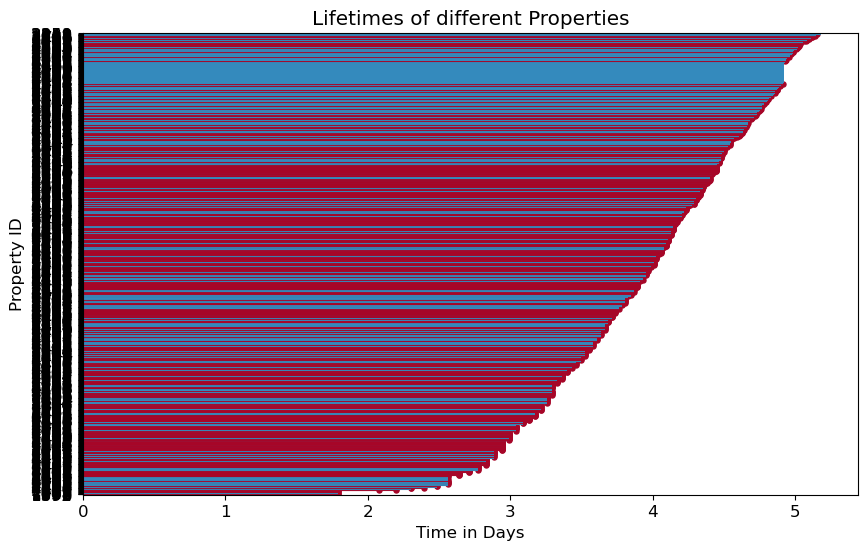

In [69]:
# Usar plot_lifetimes
plt.figure(figsize=(10, 6))
plot_lifetimes(durations, event_observed=events)
plt.title('Lifetimes of different Properties')
plt.xlabel('Time in Days')
plt.ylabel('Property ID')
plt.show()

### End of survival part

In [65]:
m = DecisionTreeRegressor(max_leaf_nodes=4)
m.fit(xs, y);

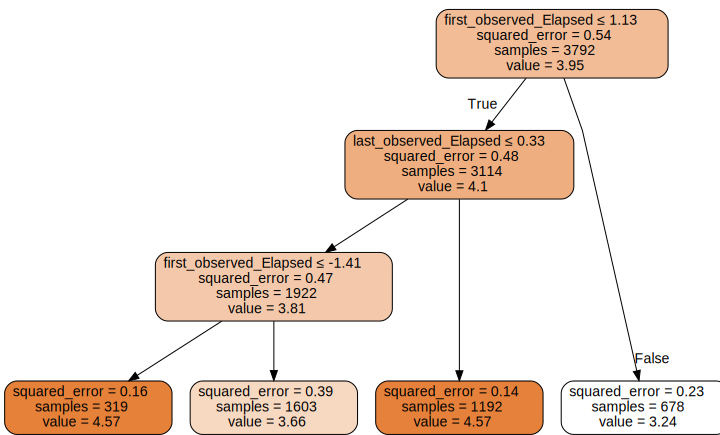

In [66]:
draw_tree(m, xs, size=10, leaves_parallel=True, precision=2)

In [28]:
samp_idx = np.random.permutation(len(y))[:500]

In [29]:
m = DecisionTreeRegressor(max_leaf_nodes=4).fit(xs, y)

In [30]:
m = DecisionTreeRegressor()
m.fit(xs, y);

In [31]:
def r_mse(pred,y): return round(math.sqrt(((pred-y)**2).mean()), 6)
def m_rmse(m, xs, y): return r_mse(m.predict(xs), y)

In [32]:
m_rmse(m, xs, y)

0.0

In [33]:
m_rmse(m, valid_xs, valid_y)

0.117501

In [34]:
m.get_n_leaves(), len(xs)

(1391, 3792)

In [35]:
m = DecisionTreeRegressor(min_samples_leaf=25)
m.fit(to.train.xs, to.train.y)
m_rmse(m, xs, y), m_rmse(m, valid_xs, valid_y)

(0.136865, 0.15738)

In [36]:

m.get_n_leaves()

116

In [37]:
def rf(xs, y, n_estimators=40, max_samples=1500,
       max_features=0.5, min_samples_leaf=5, **kwargs):
    return RandomForestRegressor(n_jobs=-1, n_estimators=n_estimators,
        max_samples=max_samples, max_features=max_features,
        min_samples_leaf=min_samples_leaf, oob_score=True).fit(xs, y)

In [38]:
m = rf(xs, y);

In [39]:
m_rmse(m, xs, y), m_rmse(m, valid_xs, valid_y)

(0.088419, 0.104946)

In [71]:
preds = np.stack([t.predict(valid_xs) for t in m.estimators_])

In [41]:
r_mse(preds.mean(0), valid_y)

0.104946

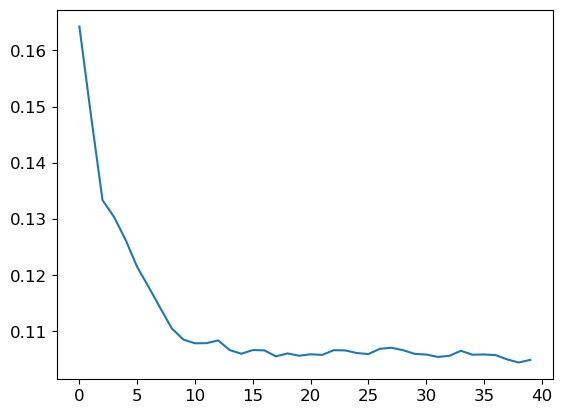

In [42]:
plt.plot([r_mse(preds[:i+1].mean(0), valid_y) for i in range(40)]);

In [43]:
r_mse(m.oob_prediction_, y)

0.10437

In [72]:
preds = np.stack([t.predict(valid_xs) for t in m.estimators_])

In [45]:
preds.shape

(40, 948)

In [46]:
preds_std = preds.std(0)

In [47]:
preds_std[:5]

array([0.1121517 , 0.27643743, 0.16073366, 0.02041776, 0.05220831])

In [48]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)
     

In [49]:
fi = rf_feat_importance(m, xs)
fi[:10]

,cols,imp
49,first_observed_Elapsed,0.244355
48,first_observed_Dayofyear,0.195203
55,last_observed_Elapsed,0.184352
54,last_observed_Dayofyear,0.113135
45,first_observed_Week,0.098354
51,last_observed_Week,0.071649
44,first_observed_Month,0.032555
50,last_observed_Month,0.028809
20,event,0.010069
32,num_marketplaces_property_at,0.006819


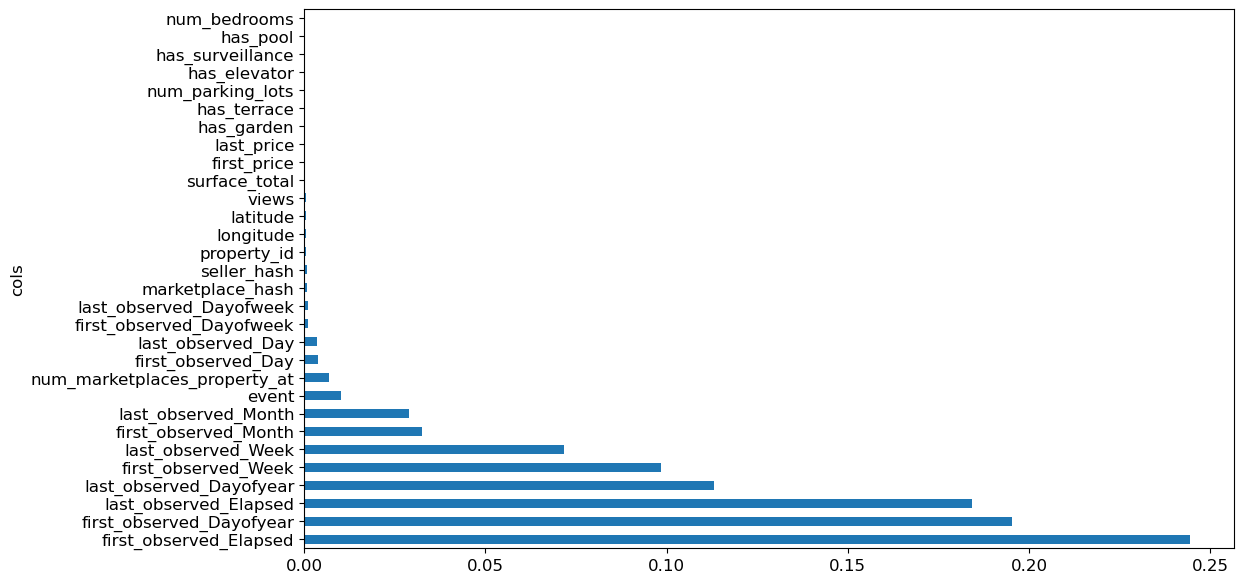

In [50]:
def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

plot_fi(fi[:30]);

In [51]:
to_keep = fi[fi.imp>0.005].cols
len(to_keep)

10

In [52]:
xs_imp = xs[to_keep]
valid_xs_imp = valid_xs[to_keep]

In [53]:
m = rf(xs_imp, y)

# Result

In [54]:
m_rmse(m, xs_imp, y), m_rmse(m, valid_xs_imp, valid_y)

(0.084817, 0.093694)

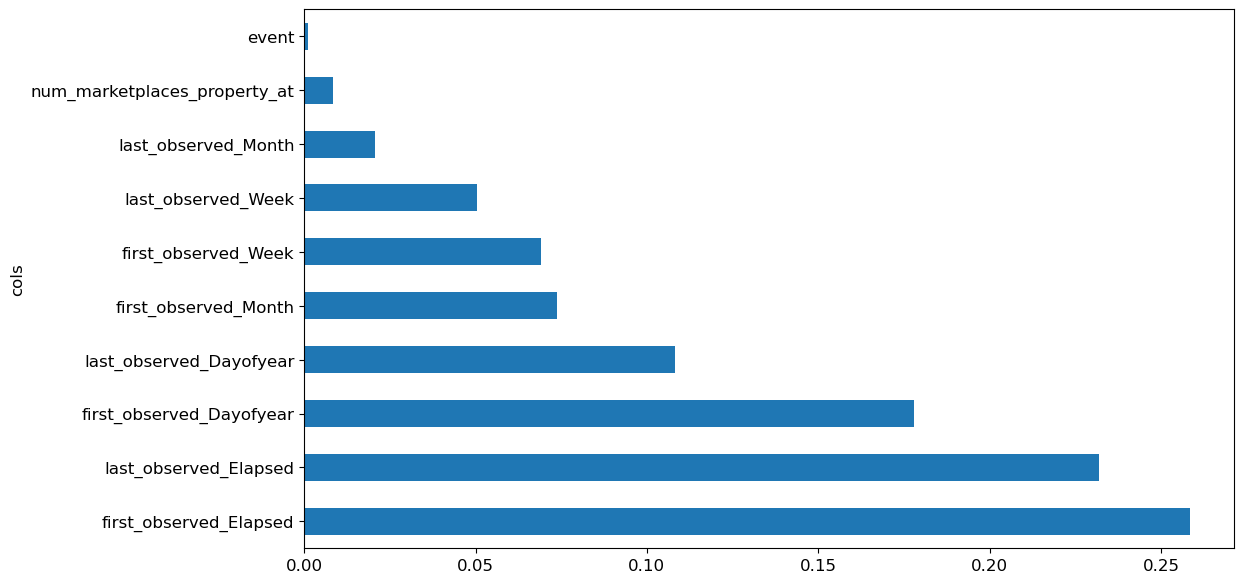

In [56]:

plot_fi(rf_feat_importance(m, xs_imp));

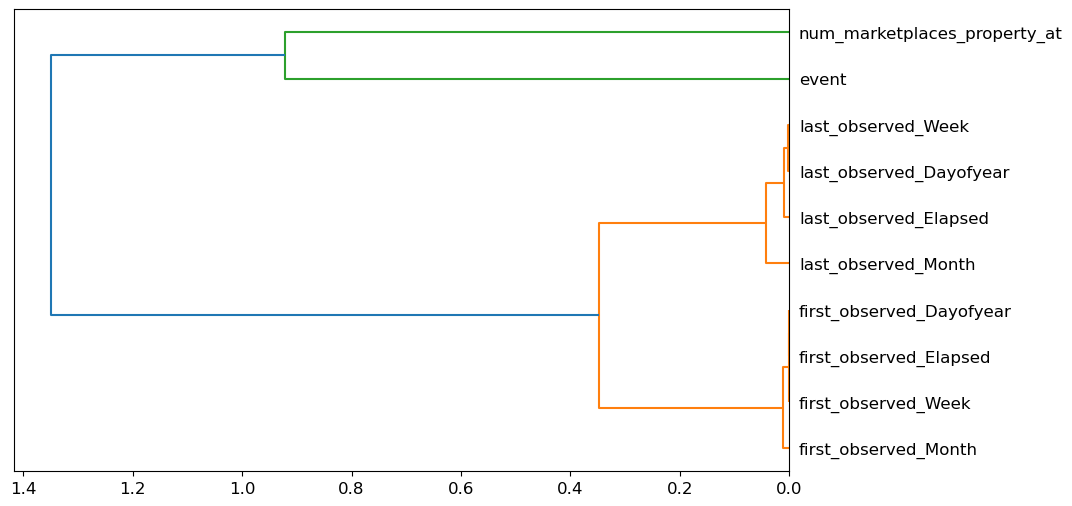

In [57]:
cluster_columns(xs_imp)